In [1]:
%pip install seaborn
%pip install folium

Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/102.3 kB ? eta -:--:--
     ----------------------------------- --- 92.2/102.3 kB 1.3 MB/s eta 0:00:01
     ------------------------------------ 102.3/102.3 kB 979.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

---


# 資料集

**歷史野火**

此野火資料集包含 2005 年以來澳洲火災活動的資料。更多資訊請造訪 [here](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl).

變數

- 地區：7個地區
- data：UTC 格式並提供提前 24 小時的數據
- Estimated_fire_area：推定植被火災的估計火災面積的每日總和，置信度 >每個區域 75%（以平方公里為單位）
- Mean_estimated_fire_brightness：置信水準 > 的假定植被火災的估計火災亮度的每日平均值（透過標記的火災像素（=計數））開爾文 75%
- Mean_estimated_fire_radiative_power：置信水準 > 的推定植被火災的估計輻射功率的每日平均值給定區域的 75%（兆瓦）
- Mean_confidence：置信水準 > 的推定植被火災的每日置信平均值。 75%
- Std_confidence：估計火災輻射功率的標準差（兆瓦）
- Var_confidence：估計火災輻射功率的變異數（兆瓦）
- Count: 給定區域的置信水準大於 75% 的每日推定植被火災像素數
- Replaced: 以 Y 表示資料是否已替換為可用的標準品質資料（通常有 2-3 個月的延遲）。替換後的資料在位置方面品質稍高


---


In [5]:
#from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
#resp = await fetch(URL)
#text = io.BytesIO((await resp.arrayBuffer()).to_py())
df = pd.read_csv(URL)
print('Data read into a pandas dataframe!')


Data read into a pandas dataframe!


In [6]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


---


In [7]:
#Column names
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [8]:
#data type
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

注意「日期」的類型；是對象，讓我們將其轉換為“datatime”；

輸入並提取“年份”；和“月”從日期開始並作為單獨的列包含在資料框中

In [9]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [10]:
#verify the columns again

df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int64
Month                                    int64
dtype: object

---


## Practice Tasks


### 任務 1.1：讓我們試著了解平均估計火災面積隨時間的變化
（使用 pandas 繪製）


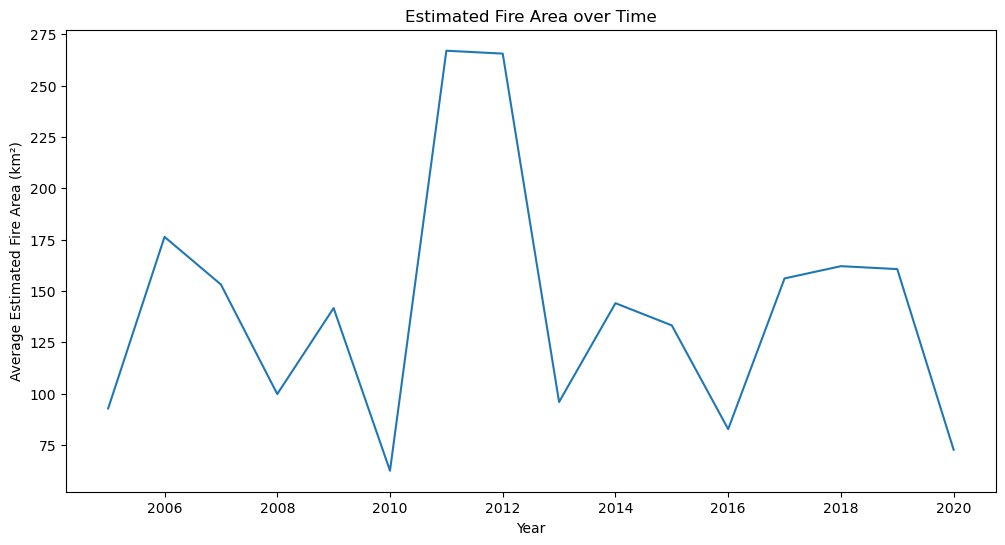

In [11]:

plt.figure(figsize=(12, 6))

df_new = df.groupby('Year')['Estimated_fire_area'].mean()

df_new.plot(x=df_new.index, y=df_new.values)

plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')

plt.show()

---


### 任務 1.2：可以注意到圖中 2010 年至 2013 年之間的峰值。
透過繪製按年份和月份分組的估計火災面積來縮小我們的發現範圍。


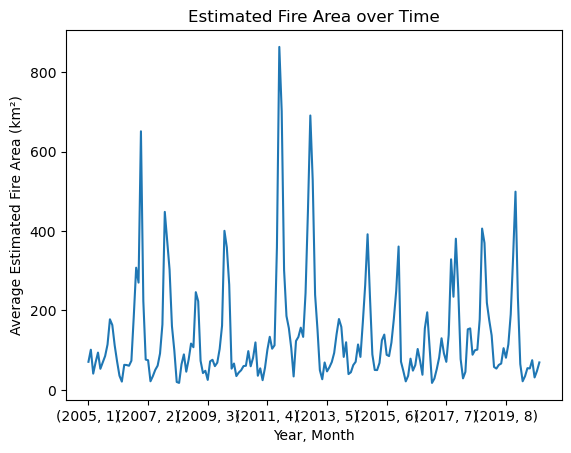

In [12]:
# TODO
df_new = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()

df_new.plot(x=df_new.index, y=df_new.values)

plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')

plt.show()

該圖表示估計火災面積在 2011 年後、4 月和 2012 年之前達到高峰。您可以在 google/news 上驗證，這是澳洲野火最嚴重的時間

---


### 任務 1.3：讓我們深入了解各區域平均估計火災亮度的分佈
使用seaborn 的功能來開發條形圖< a i=2>


In [13]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

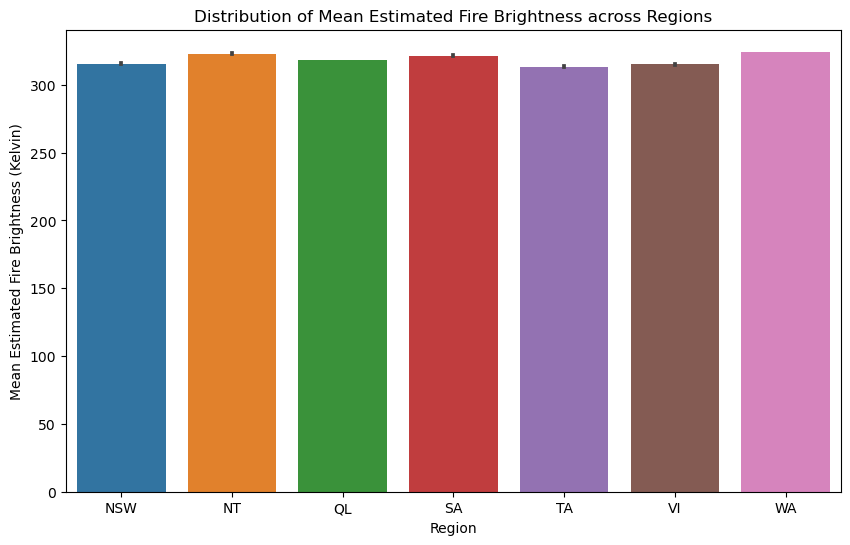

In [14]:
#TODO

plt.figure(figsize=(10, 6))

sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')

plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')

plt.show()

---


### 任務 1.4：讓我們找出推測的植被火災的像素計數部分在不同地區的差異圖


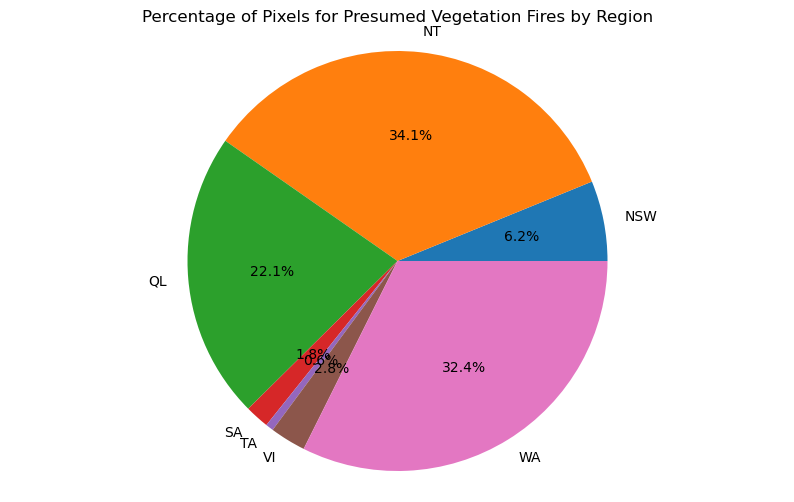

In [15]:
plt.figure(figsize=(10, 6))

region_counts = df.groupby('Region')['Count'].sum()

plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')

plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')

plt.show()

---


### TASK 1.6: 讓我們試著繪製平均估計火災亮度的直方圖
使用 Matplotlib 建立直方圖


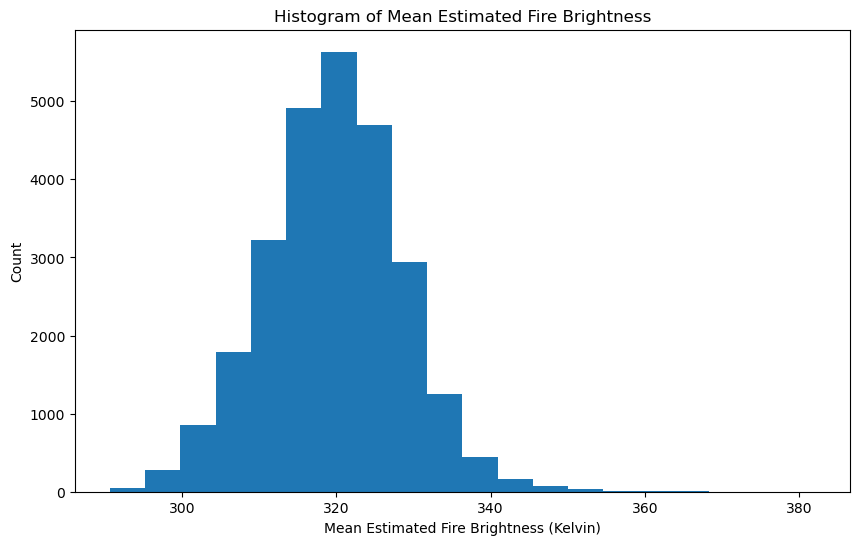

In [16]:
#TODO
plt.figure(figsize=(10, 6))

plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)

plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')

plt.show()

### TASK 1.7: 如果我們需要了解估計的火災亮度在各區域的分佈呢？
讓我們使用seaborn的功能並傳遞區域作為色調


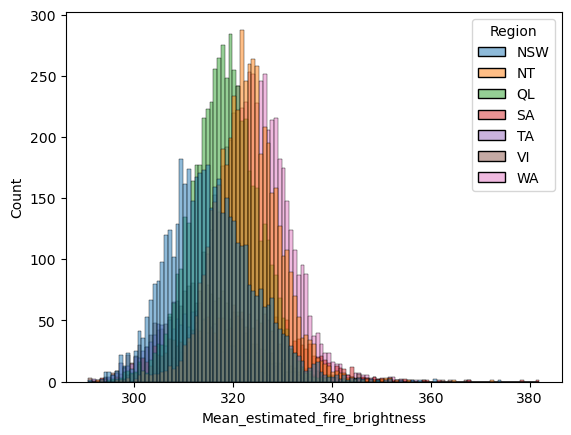

In [17]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region')
plt.show()

### 看起來更好了！，現在在 histplot() 中包含參數 multiple='stack' 並查看差異。還包括標籤和標題


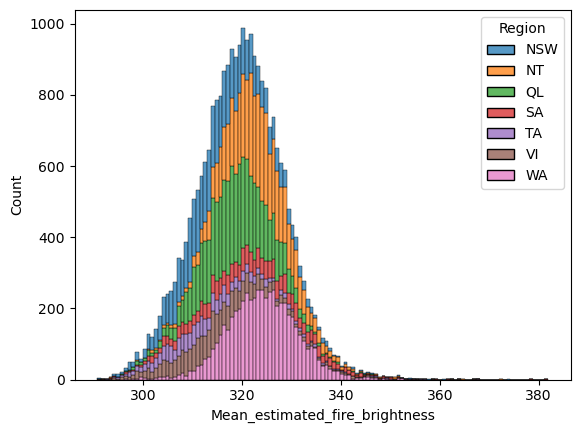

In [18]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.show()

---


### TASK 1.8: 試著找出平均估計火災輻射功率和平均置信度之間是否存在相關性


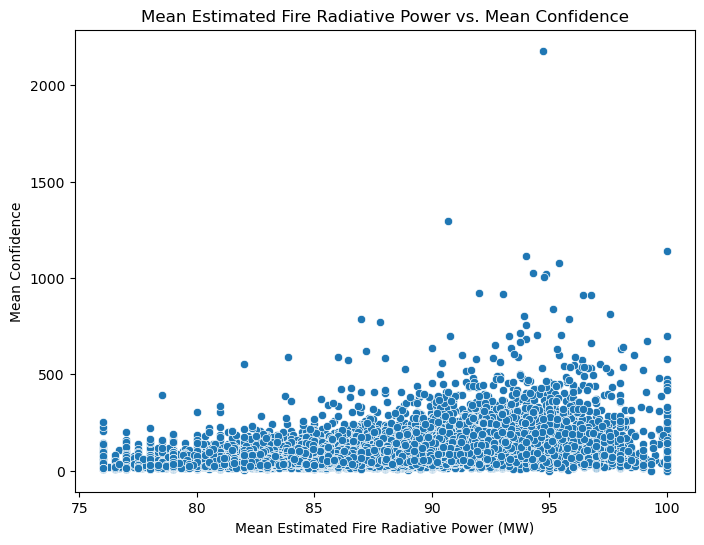

In [19]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')

plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')

plt.show()

---


### TASK 1.9: 使用 Folium 在澳洲地圖上標記這七個區域
<br> 建立了一個資料框，其中包含區域及其緯度和經度。
對於澳大利亞，請使用 [-25, 135] 作為建立地圖的位置


In [20]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [21]:
# instantiate a feature group 
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)

---


Copyright © 2023 IBM Corporation. All rights reserved.